In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [10]:
#Read into the Starbucks csv file
df = pd.read_csv('SBUX.csv', parse_dates = ['Date'])
print(df)

           Date        Open        High        Low      Close  Adj Close  \
0    1992-06-26    0.328125    0.347656   0.320313   0.335938   0.264262   
1    1992-06-29    0.339844    0.367188   0.332031   0.359375   0.282698   
2    1992-06-30    0.367188    0.371094   0.343750   0.347656   0.273479   
3    1992-07-01    0.351563    0.359375   0.339844   0.355469   0.279625   
4    1992-07-02    0.359375    0.359375   0.347656   0.355469   0.279625   
...         ...         ...         ...        ...        ...        ...   
7914 2023-11-29  101.510002  101.690002  99.529999  99.849998  99.849998   
7915 2023-11-30  100.059998  100.120003  98.419998  99.300003  99.300003   
7916 2023-12-01   98.500000   99.279999  97.519997  99.199997  99.199997   
7917 2023-12-04   98.389999   98.879997  96.769997  97.599998  97.599998   
7918 2023-12-05   97.379997   97.480003  94.849998  95.540001  95.540001   

         Volume  
0     224358400  
1      58732800  
2      34777600  
3      18316800

In [11]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

           Date      Close  Adj Close
5672 2015-01-02  40.720001  34.400902
5673 2015-01-05  39.939999  33.741943
5674 2015-01-06  39.615002  33.467388
5675 2015-01-07  40.590000  34.291069
5676 2015-01-08  41.244999  34.844429
...         ...        ...        ...
6925 2019-12-24  88.519997  81.627518
6926 2019-12-26  88.080002  81.221771
6927 2019-12-27  88.129997  81.267868
6928 2019-12-30  87.440002  80.631607
6929 2019-12-31  87.919998  81.074219

[1258 rows x 3 columns]


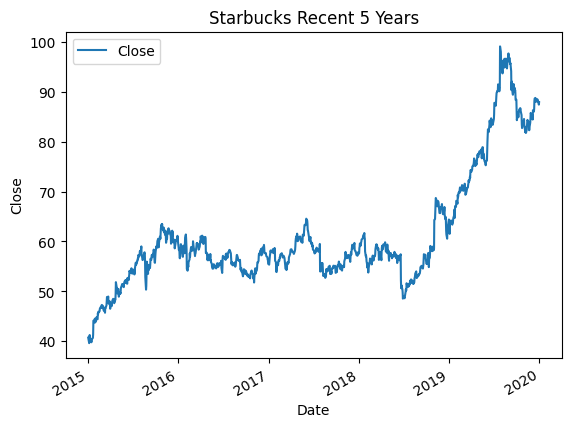

In [12]:
#Plot the trimmed data
df_trim.plot(title= 'Starbucks Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('Starbucks 5Years.png')
plt.show()

In [13]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

           Date      Close  Adj Close  Daily Percent Change
5672 2015-01-02  40.720001  34.400902             -0.007435
5673 2015-01-05  39.939999  33.741943             -0.019155
5674 2015-01-06  39.615002  33.467388             -0.008137
5675 2015-01-07  40.590000  34.291069              0.024612
5676 2015-01-08  41.244999  34.844429              0.016137
...         ...        ...        ...                   ...
6925 2019-12-24  88.519997  81.627518              0.003287
6926 2019-12-26  88.080002  81.221771             -0.004971
6927 2019-12-27  88.129997  81.267868              0.000568
6928 2019-12-30  87.440002  80.631607             -0.007829
6929 2019-12-31  87.919998  81.074219              0.005489

[1258 rows x 4 columns]


In [14]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

           Date      Close  Adj Close  Daily Percent Change  Quarter
5672 2015-01-02  40.720001  34.400902             -0.007435        1
5673 2015-01-05  39.939999  33.741943             -0.019155        1
5674 2015-01-06  39.615002  33.467388             -0.008137        1
5675 2015-01-07  40.590000  34.291069              0.024612        1
5676 2015-01-08  41.244999  34.844429              0.016137        1
...         ...        ...        ...                   ...      ...
6734 2019-03-25  72.300003  65.783165              0.004725        1
6735 2019-03-26  72.959999  66.383698              0.009129        1
6736 2019-03-27  72.739998  66.183510             -0.003015        1
6737 2019-03-28  73.959999  67.293571              0.016772        1
6738 2019-03-29  74.339996  67.639297              0.005138        1

[306 rows x 5 columns]
           Date      Close  Adj Close  Daily Percent Change  Quarter
5733 2015-04-01  46.509998  39.435799             -0.017740        2
5734 2015-

In [15]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.5410218693053026


In [16]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.5196141426169998
0.8130634396116065
0.7813734468215502


In [17]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                      0.001201                         0.541022
2   Quarter 2                      0.000169                         0.519614
3   Quarter 3                      0.000495                         0.813063
4   Quarter 4                      0.000916                         0.781373
5     Overall                      0.000691                              NaN


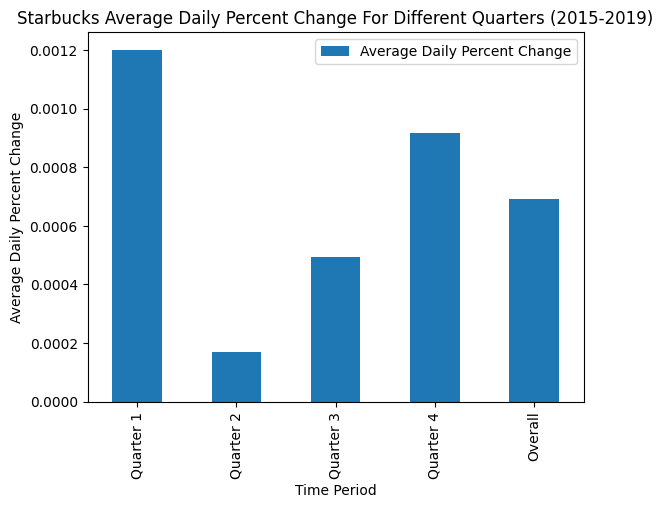

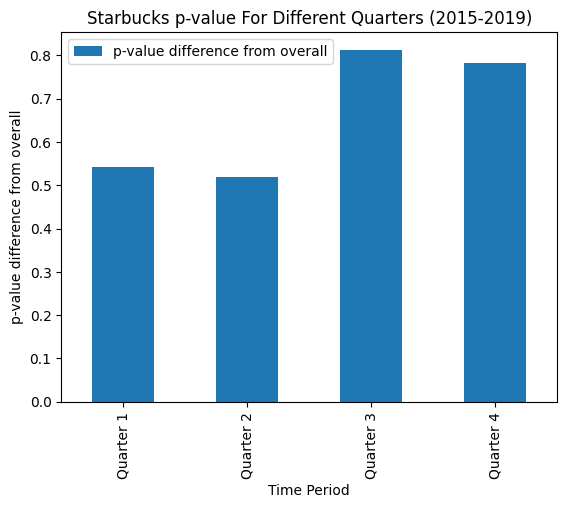

In [18]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'Starbucks Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('Starbucks AverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'Starbucks p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('Starbucks P-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

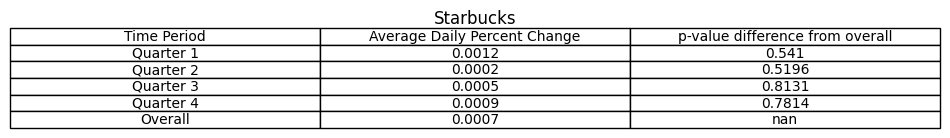

In [19]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('Starbucks')
plt.axis('off')
plt.savefig('Starbucks Table.png', bbox_inches = "tight")
plt.show()